# Phase II: Data Curation, Exploratory Analysis and Plotting

### <font color='red'> DS3000 SEC04 (Spring 2025) </font>

### <font color='red'> Professor: Dr. Mohit Singhal </font>

### <font color='red'> Team Members: Tarun, Ryan, Saanika, Alex </font>

INTRODUCTION:

Are there any indicators that could help us predict the economic status of a country? Our goal is to analyze the past 15-25 years worth of data regarding the GDP growth, unemployment rate and inflation rate of different areas of the world and see if there were any underlying indicators behind major recessions that could help us predict future recessions using machine learning. We'd also like to explore the idea of picking statistics that aren't intuitively related in order to find out if there exists a correlation between the two. Furthermore, with information spreading about how global education levels have fallen since COVID, We want to study if it has a potential effect on the economy of the world. Our key questions are:

1. Is it possible to predict economic status given certain parameters?
2. Is there a correlation between unemployment rate and inflation? Does this differ across regions?
3. Can education levels impact economy?
4. Is Foreign Direct Investment beneficial for economies?
5. Are some regions of thr world growing differently than others?

We plan to use the [World Bank API](https://documents.worldbank.org/en/publication/documents-reports/api ) to gather economic data from different countries and world regions to help understand trends in modern history.

Below is a short demonstration of reading through the World Bank API and it's not very difficult to use.

## API Call Explanation:

For the API call, when we call the world bank, we manipulate the APi using the following parameters

1. Indicators: Using various indicators, we can call different types of information such as GDP Growth (%), Inflation Rate (%), Unemployment Rate (%), and Foreign Direct Investment as a % of GDP.
2. Date range: using the date portion of the API link, we can call data from the API for each of the countries we are looking at for a specific date range.


In [1]:
import requests
import pandas as pd

# merged_df = pd.DataFrame()

# Define indicators
gdp_indicator = "NY.GDP.MKTP.KD.ZG"  # GDP Growth (%)
unemployment_indicator = "SL.UEM.TOTL.ZS"  # Unemployment Rate (%)
inflation_indicator = "FP.CPI.TOTL.ZG"  # Inflation Rate (%)
fdi_indicator = "BX.KLT.DINV.WD.GD.ZS" # FDI Amount ($)

years = list(range(2000, 2023))

# Function that gets all data from World Bank API
def fetch_data(indicator):
    url = f"http://api.worldbank.org/v2/country/all/indicator/{indicator}?date={years[0]}:{years[-1]}&format=json&per_page=1000"
    response = requests.get(url)
    data = response.json()

    return pd.DataFrame([
        {"Country": entry["country"]["value"],
         "Code": entry["country"]["id"],
         "Year": entry["date"],
         "Value": entry["value"]}
        for entry in data[1]
    ]) if isinstance(data, list) and len(data) > 1 else pd.DataFrame()

# Get data for each indicator
gdp_df = fetch_data(gdp_indicator).rename(columns={"Value": "GDP Growth (%)"})
unemployment_df = fetch_data(unemployment_indicator).rename(columns={"Value": "Unemployment Rate (%)"})
inflation_df = fetch_data(inflation_indicator).rename(columns={"Value": "Inflation Rate (%)"})
fdi_df = fetch_data(fdi_indicator).rename(columns={"Value": "Foreign Direct Investment"})


 # Merge all the coloumns
merged_df = gdp_df.merge(unemployment_df, on=["Country","Code", "Year"], how="outer")
merged_df = merged_df.merge(inflation_df, on=["Country", "Code", "Year"], how="outer")
merged_df = merged_df.merge(fdi_df, on=["Country", "Code","Year"], how="outer")


# Save to CSV
# merged_df.to_csv("foundationsOfDataScienceProject.csv")

merged_df[: 70]

,Country,Code,Year,GDP Growth (%),Unemployment Rate (%),Inflation Rate (%),Foreign Direct Investment
0,Africa Eastern and Southern,ZH,2022,3.553878,7.985202,10.773751,1.695914
1,Africa Eastern and Southern,ZH,2021,4.576393,8.577385,7.240978,5.012059
2,Africa Eastern and Southern,ZH,2020,-2.864293,8.191395,5.405162,1.361762
3,Africa Eastern and Southern,ZH,2019,2.194319,7.584419,4.653665,1.424519
4,Africa Eastern and Southern,ZH,2018,2.666632,7.360513,4.720805,1.272290
...,...,...,...,...,...,...,...
65,Arab World,1A,2003,4.281254,12.456351,2.712592,1.144935
66,Arab World,1A,2002,1.229342,12.512530,1.832994,0.666657
67,Arab World,1A,2001,2.103103,12.505882,1.772204,0.693799
68,Arab World,1A,2000,6.354123,12.627487,1.853790,0.473471


The above data set is mostly clean and the aim is to use machine learning to predict all of the statistics 1, 5, and 10 years into the future. We'll use numerical features like GDP, unemployment rate, inflation rate and categorical data such as country, region, and year. Using this, we can predict future values using the machine learning method of logistic regression. In the future, we would also like to explore the potential of using neural networks to categorize the countries/regions based on their economic statistics.

For the first graph, we'll only grab the unemployment and inflation rate data, and only focus on a few regions. For this example, let's focus on the data for 'Africa Eastern and Southern', 'Arab World', and 'European Union', as well as the aggregate 'World' data for comparison.

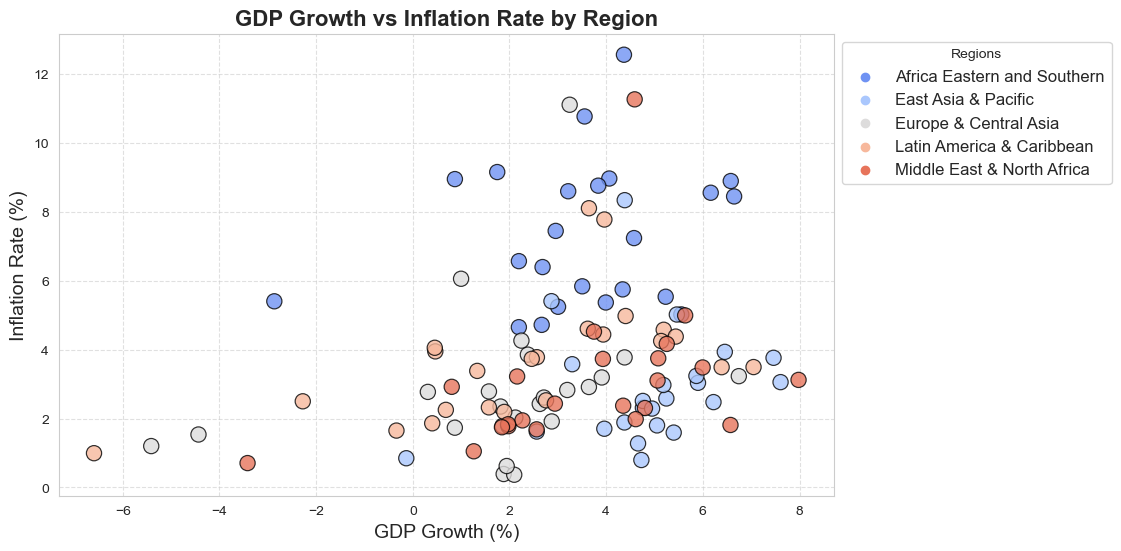

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plot_df = merged_df.dropna(subset=["GDP Growth (%)", "Inflation Rate (%)"])
regions_to_plot = ["Africa Eastern and Southern", "Latin America & Caribbean", 
                   "Europe & Central Asia", "Middle East & North Africa", "East Asia & Pacific"]
plot_df = plot_df[plot_df["Country"].isin(regions_to_plot)]

# Creating scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=plot_df, x="GDP Growth (%)", y="Inflation Rate (%)", hue="Country", 
                palette="coolwarm", s=120, edgecolor="black", alpha=0.8)
ax.set_xlabel("GDP Growth (%)", fontsize=14)
ax.set_ylabel("Inflation Rate (%)", fontsize=14)
ax.set_title("GDP Growth vs Inflation Rate by Region", fontsize=16, fontweight="bold")
ax.grid(True, linestyle="--", alpha=0.6)
ax.legend(title="Regions", fontsize=12, loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

# Graph #1 Explanation
The scatterplot above explores the relationship between GDP Growth (%) and Inflation Rate (%) across different world regions. Each data point represents a specific year and region, color-coded to distinguish between geographical areas. While there are some patterns in the data, the relationship between GDP growth and inflation appears complex, suggesting that other economic factors likely play a significant role in influencing inflation.

One noticeable pattern in the graph is the variation in inflation sensitivity across regions. For example, Africa Eastern and Southern show a wider range of inflation rates, even when GDP growth remains moderate. This suggests that external factors, such as commodity price fluctuations or political instability, may impact inflation more in certain regions than in others. In contrast, Europe & Central Asia display more stability, with less inflation variation, likely due to more regulated economic environments and policies. Latin America & the Caribbean appear to be more scattered, reflecting economic instability or inconsistent policy measures across different countries.

While this analysis highlights some patterns, GDP Growth and Inflation Rate alone may not be sufficient to predict economic downturns or recessions. Our research aims to explore whether additional factors, such as unemployment rates and education levels, contribute to economic instability. The findings from this graph reinforce the need for a more comprehensive approach to economic prediction. By incorporating more diverse indicators, we can gain deeper insights into the factors driving recessions and assess whether machine learning can be used to identify early warning signs of economic downturns.


In [11]:
# Creating Side by Side Box plots for the GDP Growth of 8 countries.
# Countries Code include: "Africa Eastern and Southern", "Latin America & Caribbean", 
#                         "Europe & Central Asia", "Middle East & North Africa", "East Asia & Pacific"

import plotly.express as px
import matplotlib.pyplot as plt

countries = ["Africa Eastern and Southern", "Latin America & Caribbean", "Europe & Central Asia", "Middle East & North Africa", "East Asia & Pacific"]
filtered_data = merged_df[merged_df['Country'].isin(countries)]

fig = px.box(filtered_data, 
             x = 'Country',
             y = 'GDP Growth (%)',
             title = 'Distribution of GDP Growth (%) by Country',
             labels = {'x': 'Country', 'y': 'GDP Growth (%)'},
             color = 'Country',
             )
fig.update_layout(
    plot_bgcolor = 'white',
    title_x = .4,
    legend_title = 'Regions')

fig.show()

# fig.write_image("plotly_graph.png")
# Note for Grader, this graph is run, but not showing up on Github in the submission for some reason.
# Submitting the image with the file.

# Graph #2 Explanation
This graph is a Side-By-Side box plot showing the distribution of GDP Growth % for the country regions "Africa Eastern and Southern", "Latin America & Caribbean", "Europe & Central Asia", "Middle East & North Africa", "East Asia & Pacific". The aim of the visualization is to determine which regions have grown the most over the past ~20 years. 

From the visualization, it is clear that the highest growth region is East Asia & Pacific. This is because the distribiution is very tightly centered around the median, and the lowest portion of the InterQuartile range (Q1) is significantly higher than that of the other countries displayed in the visualization.

Additionally, it is clear from the visualization that the region "Latin America & Carribean" has seen the most volatile amount of GDP Growth over the observed period, with the largest distribution and interquartile range.

/Users/ryancaress/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x600 with 0 Axes>

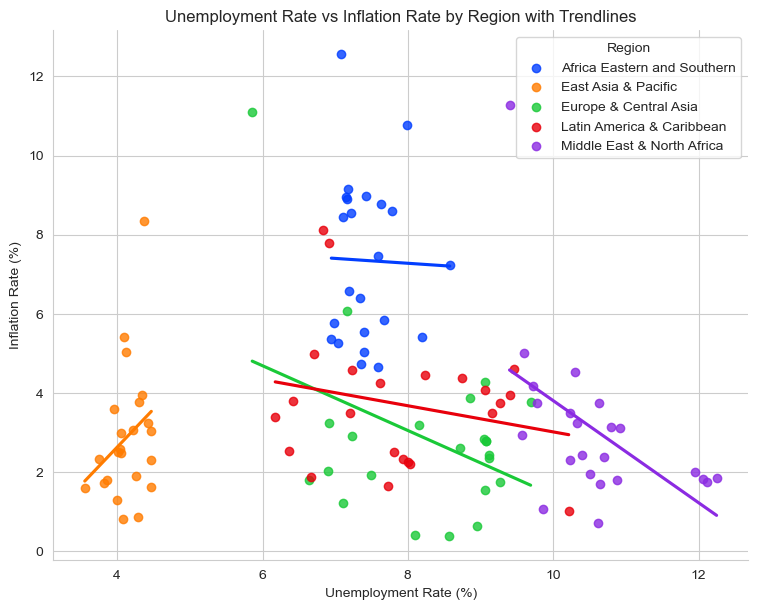

In [4]:
# Creating a new df with only data for regions in code list:
# all we need is the region name, unemployment rate, and inflation rate.

countries = ["Africa Eastern and Southern", "Latin America & Caribbean",
             "Europe & Central Asia", "Middle East & North Africa",
             "East Asia & Pacific"]

country_data = merged_df[merged_df['Country'].isin(countries)][['Country',
                                                        'Unemployment Rate (%)',
                                                        'Inflation Rate (%)']]

# Scatter plot of unemployment rate (x) vs inflation (y), countries color coded
# Trendlines / Regression lines added using sns.lmplot()

plt.figure(figsize=(10, 6))
scatter = sns.lmplot(data=country_data,
                     x="Unemployment Rate (%)",
                     y="Inflation Rate (%)",
                     hue="Country",
                     palette="bright",
                     ci=None,
                     aspect=1.3,
                     height=6)

# Set axis titles, remove the original legend and add our own
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Inflation Rate (%)")
plt.title("Unemployment Rate vs Inflation Rate by Region with Trendlines")
scatter._legend.remove()
plt.legend(title="Region", loc='upper right')

plt.show()

# Graph #3 Explanation
In the 50s and 60s, British economist [A.W. Phillips](https://www.economicshelp.org/blog/1364/economics/phillips-curve-explained/) noticed an inverse relationship of exponential decay between unemployment rate and inflation rate. Namely, those in power could either prioritize inflation which would lead to more unemployment, or they could strive to decrease the unemployment rate which would lead to higher inflation. This model is called the "Phillips Curve", and many economists have since argued that it's too simplistic and the two variables have no correlation. Regardless, we can still apply a regression model and look for this inward curve in our data:

This graph is a little chaotic, but we can see the differences where regions tend to occupy a certain section of the map. As we can see, most regions roughly mirror the Phillips Curve trend. The one exception is the data for 'East Asia and Pacific', which shows a slight positive correlation.

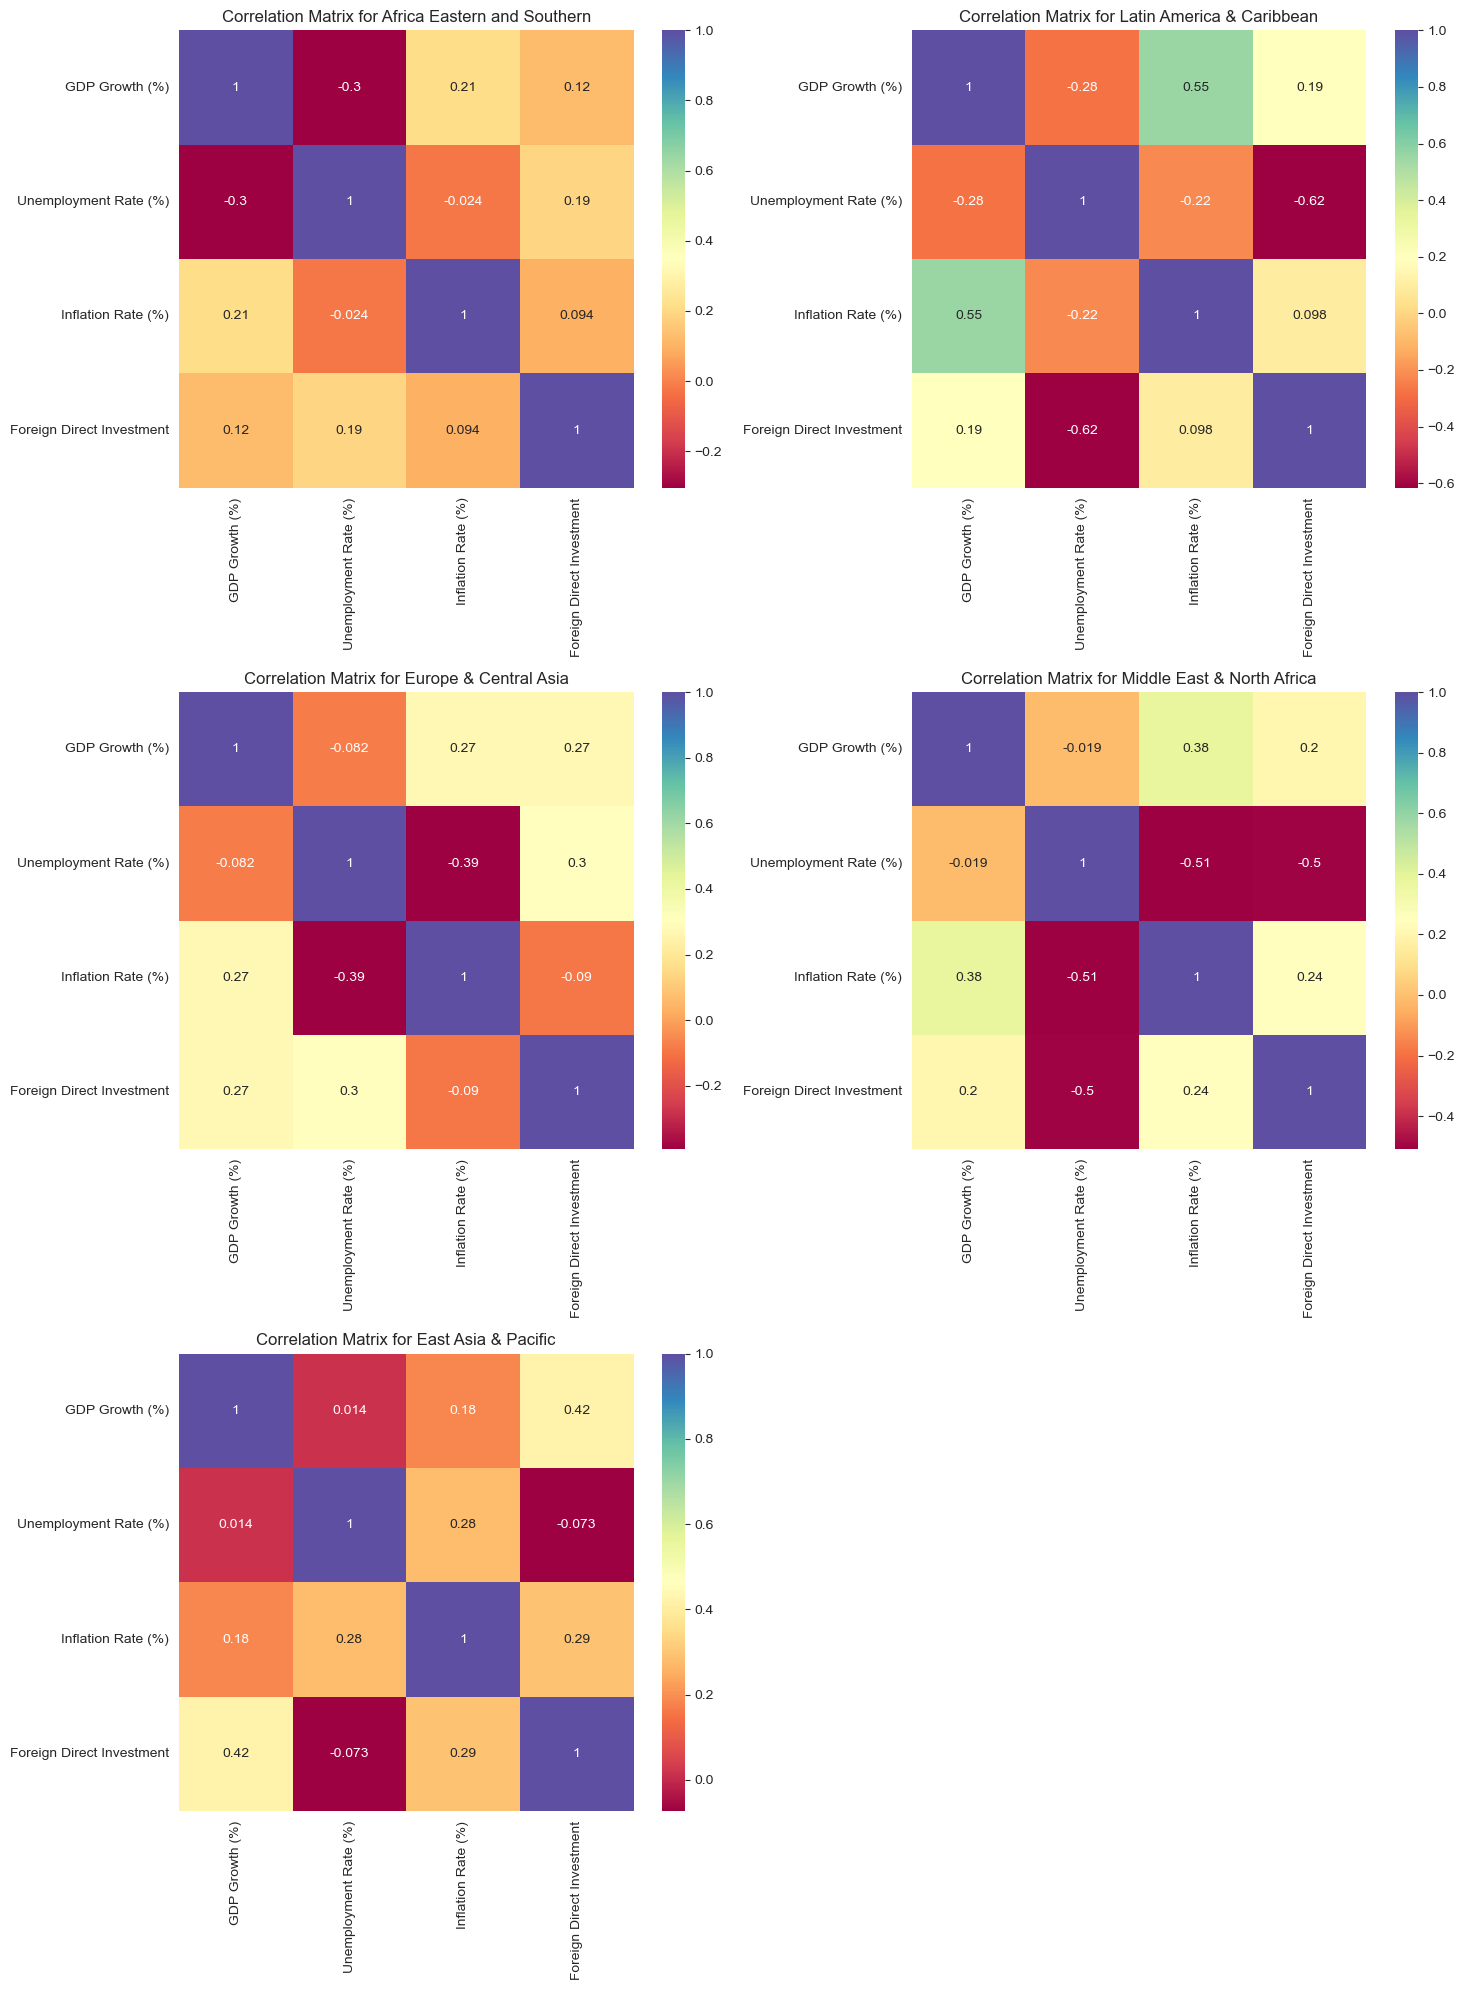

In [5]:
# Creating a Correlation Matrix for each country in the codes list, showing the correlation between features
# Countries Code include: "Africa Eastern and Southern", "Latin America & Caribbean", 
#                         "Europe & Central Asia", "Middle East & North Africa", "East Asia & Pacific"

import matplotlib.pyplot as plt
import seaborn as sns

countries = ["Africa Eastern and Southern", "Latin America & Caribbean", "Europe & Central Asia", "Middle East & North Africa", "East Asia & Pacific"]

# Create the figure
fig = plt.figure(figsize = (15,20))

# Iterates through code in the codes list enumerating each position
for i, country in enumerate(countries):

    country_data = merged_df[merged_df['Country'] == country]
    correlation_matrix = country_data[['GDP Growth (%)', 'Unemployment Rate (%)', 'Inflation Rate (%)', 'Foreign Direct Investment']].corr()
    
    current_axes = plt.subplot(3,2, i+1)
    
    sns.heatmap(correlation_matrix, annot = True, cmap = 'Spectral', ax = current_axes)
    
    current_axes.set_title(f"Correlation Matrix for {country_data['Country'].iloc[0]}")


# Creating a combined correlation matrix for analysis:
country_data = merged_df[merged_df['Country'].isin(countries)]
country_data.to_csv('Country_Data_CSV.csv', index = False)

# # Plot the current Axis
# sns.heatmap(correlation_matrix_combined, annot = True, cmap = 'Spectral', ax = current_axes)
# current_axes.set_title(f"Correlation Matrix for all the countries combined")


# Display the subplots
plt.tight_layout()
plt.show()


# Graph #4 Explanation

For the analyses, I am going to focus on discussing the relationships between all of the features in the merged_df matrix, and their correlations with the Unemployment Rate(%).

### Relationship #1: Gdp Growth % and Unemployment Rate (%):
For the majority of the regions analyed, There is a trend towards a weak negative relationship as illustrated by the correlation matricies. While some regions saw stronger negative relationships, some regions saw practically no relationship at all.
- This means that as GDP Growth % Rises in some countries, the Unemployment rate may see a decline based on the correlations, however, this correlation appears to be non-existent in some regions.

- The countries where this relationship was the strongest include:
1. Africa Eastern and Southern (-0.30 Correlation), and 
2. Latin America and the Carribean(-0.28 Correlation)

### Relationship #2: Inflation Rate % and Unemployment Rate (%):
For the majority of the regions analyed in the matrix, There is a trend towards a relatively negative relationship as illustrated by the heatmaps. The one region that illustrated a positive relationship was East Asia and Pacific.
- This means that as Inflation Rates rise, the Unemployment rate may fall based on this correlation, however, the average correlation is inconsistent around the world.

- The countries where this relationship was the strongest include:
1. Europe and Central Asia showing a (-0.39 Correlation)
2. Middle East and North Africa showing a (-0.51 Correlation, which appears to be rather significant) 


### Relationship #3: Foreign Direct Investment, and Unemplyoment Rate (%):
For the relationship between Foreign Direct Investment, and Unemplyoment Rate (%), there is a major split between the different countries, with some regions have a weak positive relationship, and others having a stronger negative relationship.
- Countries with positive correlations: 
1. Europe and Central Asia (0.30 Correlation)

- Countries with stronger negative correlations:
1. Latin America and Carribean: (-0.62 Correlation)
2. Middle East and North Africa: (-0.50 Correlation)